# Training and Testing 

In [94]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

import pickle5 as pk

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC


1. load the test_class_label.npy and train_class_label.npy  file into your jupyther notebook

In [70]:
train_labels =np.load('/Users/arianauwaibi/Downloads/train_classes_label.npy')

test_labels = np.load('/Users/arianauwaibi/Downloads/test_classes_label.npy')
 
print('showing the size of trianing data set',train_labels.shape)   # Training the machince learning algortirm with this data set and will be later then the test data
print('showing the size of test data set',test_labels.shape)  


print(train_labels[1:5])

showing the size of trianing data set (2832,)
showing the size of test data set (12002,)
[1 1 1 1]


2. load the train_number_sample_perclass.npy and test_number_sample_perclass.npy into your jupyther notebook.

In [71]:
train_number_sample = np.load('/Users/arianauwaibi/Downloads/train_number_sample_perclass.npy')

test_number_sample = np.load('/Users/arianauwaibi/Downloads/test_number_sample_perclass.npy')

print(test_number_sample[1])

size_test = np.load('/Users/arianauwaibi/Downloads/size_test.npy')
size_train = np.load('/Users/arianauwaibi/Downloads/size_train.npy')

print('Number of Pixels for Training',size_train)

print('Number of Pixels for Testing',size_test)


#Shows the number of Pixels inn the First Class 
print(test_number_sample[0])



1034
Number of Pixels for Training 2832
Number of Pixels for Testing 12002
1045


3. compare the number of elements that  train_number_sample_perclass.npy  and  train_class_label.npy, they must have the same number of elements. Do the same with the test data.

In [72]:
print('showing the size of trianing data set',train_number_sample.shape) 
print('showing the size of test data set',test_number_sample.shape)  

print(train_number_sample.shape)
print(test_number_sample.shape)


#For loop for the Amount of Pixels per Class

print("Number of Samples in TRAINING Set")
for index in range(len(train_number_sample)):
    print('class # {0:d},number of sample is {1:d}'.format(index,train_number_sample[index]))

print("Number of Samples for TESTING Set")
for index in range(len(test_number_sample)):
    print('class # {0:d},number of sample is {1:d}'.format(index,test_number_sample[index]))



showing the size of trianing data set (15,)
showing the size of test data set (15,)
(15,)
(15,)
Number of Samples in TRAINING Set
class # 0,number of sample is 198
class # 1,number of sample is 190
class # 2,number of sample is 192
class # 3,number of sample is 188
class # 4,number of sample is 186
class # 5,number of sample is 182
class # 6,number of sample is 196
class # 7,number of sample is 191
class # 8,number of sample is 193
class # 9,number of sample is 191
class # 10,number of sample is 181
class # 11,number of sample is 192
class # 12,number of sample is 184
class # 13,number of sample is 181
class # 14,number of sample is 187
Number of Samples for TESTING Set
class # 0,number of sample is 1045
class # 1,number of sample is 1034
class # 2,number of sample is 502
class # 3,number of sample is 1053
class # 4,number of sample is 1057
class # 5,number of sample is 143
class # 6,number of sample is 1018
class # 7,number of sample is 1042
class # 8,number of sample is 1033
class # 

4. Find a possible solution to use those files and the hyperspectral image to classify the images. 
you can try to do an implementation upon our previous code.

Importing Pickle File that contains pixel data for Training and Testing

In [ ]:
infile = open('/Users/arianauwaibi/Downloads/train_classes_pixels.pkl','rb')
train_class_pixels = pk.load(infile)
infile.close()


infile2 = open('/Users/arianauwaibi/Downloads/test_classes_pixels.pkl','rb')
test_class_pixels = pk.load(infile2)
infile2.close()

print(test_class_pixels)

Printing numbers of Classes and Size of the Train and Test Pixels

In [74]:
#number of pixels are mxm

# b x [nxm]
    #b = the number of bands
    #n x m is the number of pixels per column and row 


In [75]:
print(test_class_pixels[0][0])

h_town = np.load('/Users/arianauwaibi/Downloads/hs_houston.npy')

print('showing the size of image',h_town.shape)

type(h_town)

#Plotting the Spectral Signture if all the Bands (out of 144) in the 1st postion 1st (0) in the 1st Pixels 

who = h_town[:,test_class_pixels[0][0]]

print(who)
who.shape


12199
showing the size of image (144, 664845)
[  491   569   720   818   946  1008  1219  1304  1740  2014  2182  2270
  2410  2482  2406  2518  2723  3011  3169  3262  3309  3354  3412  3346
  3345  3301  3180  3218  3255  3228  3310  3404  3453  3578  3957  4167
  4348  4378  4405  4456  4546  4403  4344  4193  3932  3856  3785  3577
  3333  3316  3370  3425  3283  3146  3135  2994  2939  2905  2872  2740
  2587  2503  2411  2482  2428  2371  2374  2360  1659  2334  2773  3292
  4029  4833  5187  5031  5933  6874  8949 10512 11913 12738 13080 11527
  7963 11431 13482 13596 13640 13169 12632 12524 12443 12472 11673  9410
  9300  9758 10025 10669 11628 11984 11974 11606 12038 12106 11814 12097
 12119 11852 11756 10971  8509  7357  7655  6576  6169  7017  6626  3836
  1769  2062  1991  2100  2325  2768  3760  5382  6240  6395  7531  8626
  9358  9660  9534  9537  9641  9844  9728  9698  9801  9916  9682  9876]


(144,)

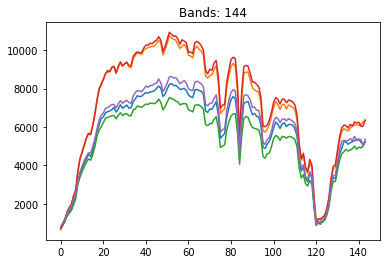

In [76]:


# plotting spectral signature of training and testing pixels
pixels = (1,2,3,4,5)
class_pixels = 0
bands = 144
fig,ax = plt.subplots() #create figure and axes
for pixels_index in range(0,len(pixels)):
    ax.plot(range(0,bands), h_town[:,test_class_pixels[10][pixels[pixels_index]]])
    ax.set_title("Bands: %i" % bands)

# Training The Model Super vector machine or Convultrarty 


Build an Array for Training the Model 

This can be done by making an iteration to extract all the pixel indices from each class

Step 1 Figure out how to sepertrae each class and its label 

15 classes/labels



for each class we need to go through the pixel index in each class

    for ecah index in the class we need to find those values in the hs array

n_class = 15 

i = index for the different classes


for i in range(0,n_class)
    for each index in class
        x_train_appened = h_town[i][each pixel index]


1st the for loop goes through each class then it goes through the index of the class then assigns that index to the (band,pixel format so we are recreating the image)


In [86]:
#Training 

n_class = 15 

x_train =[]

for i in range(n_class):
    for j in range(train_number_sample[i]): 
        x_train.append(h_town[:,train_class_pixels[i][j]])
x_train = np.array(x_train)

# Testing 
x_test= []

for i in range(n_class):
    for j in range(test_number_sample[i]): 
        x_test.append(h_town[:,test_class_pixels[i][j]])
x_test = np.array(x_test)

In [95]:
# SVM classifier: x_train is row x bands
svm = SVC()
svm.fit(x_train, train_labels)
print(svm.predict(x_test))


[ 1  1  1 ... 15 15 15]


#Print the Matrix 
Accrutay using test labels

Make the black/ blue cube

In [ ]:
#plot confusion matrix

title_options= [("Confusion matrix, normalized", None)]

for title, normalize in title_options:
    disp= plot_confusion_matrix(knn_cl, x_test, y_test, cmap=plt.cm.Blues, normalize= normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()